# **Using Simple Linear Regression with Scikit-Learn Library**



**Average Price: Electricity per Kilowatt-Hour in Miami-Fort Lauderdale-West Palm Beach, FL**

**APUS35B72610.csv can be downloaded from** https://fred.stlouisfed.org/series/APUS35B72610


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
file_path = 'APUS35B72610.csv'
electricity = pd.read_csv(file_path,index_col='DATE', parse_dates=True)
electricity.index.freq = 'MS'

In [ ]:
electricity

,APUS35B72610
DATE,
1978-11-01,0.046
1978-12-01,0.043
1979-01-01,0.043
1979-02-01,0.045
1979-03-01,0.047
...,...
2023-09-01,0.158
2023-10-01,0.158
2023-11-01,0.158


In [ ]:
electricity.rename(columns={'APUS35B72610': 'ELECTRICITY'}, inplace=True)

In [ ]:
electricity.dtypes

ELECTRICITY    object
dtype: object

In [ ]:
electricity['ELECTRICITY'] = pd.to_numeric(electricity['ELECTRICITY'], errors='coerce')

In [ ]:
electricity[electricity.isnull().any(axis=1)]

,ELECTRICITY
DATE,
1985-09-01,NaN
2019-09-01,NaN


In [ ]:
electricity.interpolate(method='time', inplace=True)

In [ ]:
electricity.isnull().sum()

ELECTRICITY    0
dtype: int64

**Average Price: Utility (Piped) Gas per Therm in Miami-Fort Lauderdale-West Palm Beach, FL**

**APUS35B72620.csv can be downloaded from** https://fred.stlouisfed.org/series/APUS35B72620

In [ ]:
file_path2 = 'APUS35B72620.csv'
gas = pd.read_csv(file_path2,index_col='DATE', parse_dates=True)
gas.index.freq = 'MS'

In [ ]:
gas

,APUS35B72620
DATE,
1978-11-01,0.617
1978-12-01,0.647
1979-01-01,0.650
1979-02-01,0.650
1979-03-01,0.650
...,...
2023-09-01,3.080
2023-10-01,3.087
2023-11-01,3.055


In [ ]:
gas.rename(columns={'APUS35B72620': 'GAS'}, inplace=True)

In [ ]:
gas.dtypes

GAS    object
dtype: object

In [ ]:
gas['GAS'] = pd.to_numeric(gas['GAS'], errors='coerce')

In [ ]:
gas[gas.isnull().any(axis=1)]

,GAS
DATE,
1985-09-01,NaN
2012-10-01,NaN
2018-02-01,NaN
2018-03-01,NaN
2018-04-01,NaN
2018-05-01,NaN
2018-06-01,NaN
2018-07-01,NaN
2018-08-01,NaN


In [ ]:
gas.interpolate(method='time', inplace=True)

In [ ]:
gas.isnull().sum()

GAS    0
dtype: int64

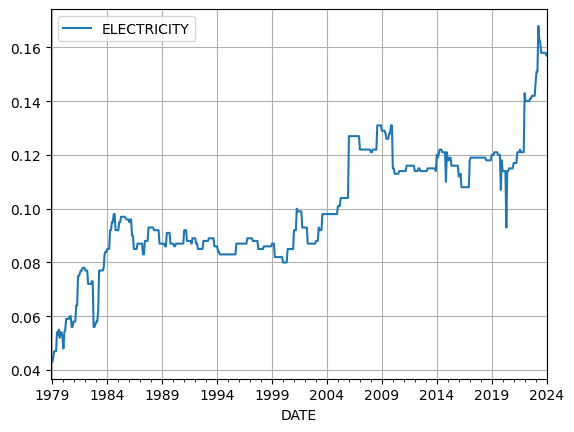

In [ ]:
electricity.plot()
plt.grid(True)

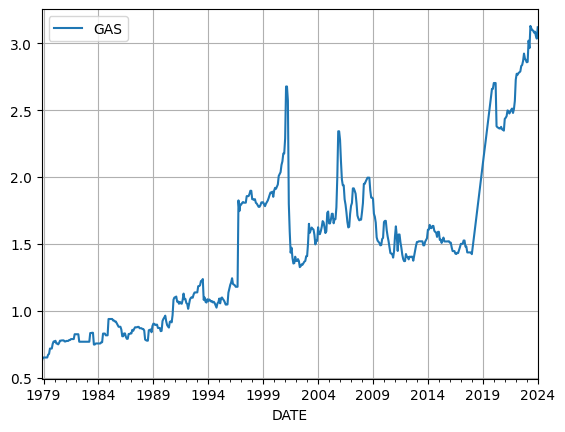

In [ ]:
gas.plot()
plt.grid(True)

**Electricity Vs. Gas Prices**

In [ ]:
elec_gas = pd.merge(electricity, gas, on='DATE', how='outer')

In [ ]:
elec_gas

,ELECTRICITY,GAS
DATE,,
1978-11-01,0.046,0.617
1978-12-01,0.043,0.647
1979-01-01,0.043,0.650
1979-02-01,0.045,0.650
1979-03-01,0.047,0.650
...,...,...
2023-09-01,0.158,3.080
2023-10-01,0.158,3.087
2023-11-01,0.158,3.055


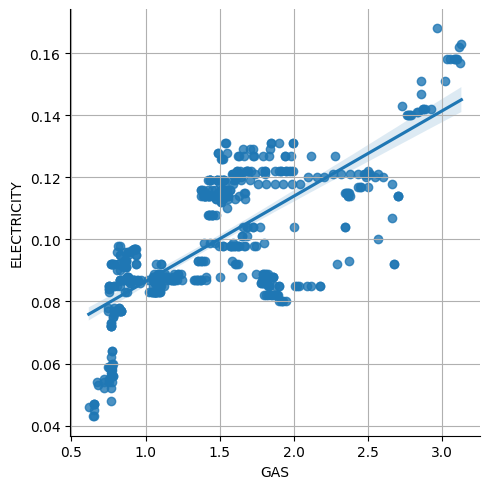

In [ ]:
sns.lmplot( x = 'GAS', y = 'ELECTRICITY', data = elec_gas)
plt.grid(True)

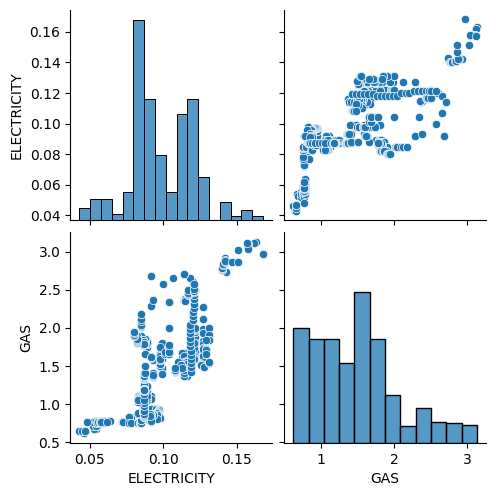

In [ ]:
sns.pairplot(elec_gas)

In [ ]:
X = elec_gas[['GAS']]

In [ ]:
X

,GAS
DATE,
1978-11-01,0.617
1978-12-01,0.647
1979-01-01,0.650
1979-02-01,0.650
1979-03-01,0.650
...,...
2023-09-01,3.080
2023-10-01,3.087
2023-11-01,3.055


In [ ]:
y = elec_gas[['ELECTRICITY']]

In [ ]:
y

,ELECTRICITY
DATE,
1978-11-01,0.046
1978-12-01,0.043
1979-01-01,0.043
1979-02-01,0.045
1979-03-01,0.047
...,...
2023-09-01,0.158
2023-10-01,0.158
2023-11-01,0.158


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42 )

In [ ]:
X_train.shape

(407, 1)

In [ ]:
X_test.shape

(136, 1)

In [ ]:
y_train.shape

(407, 1)

In [ ]:
y_test.shape

(136, 1)

**Setting Fit_Intercept to True Causes Model to Use An intercept Term**

**Regression Line Will Not Pass Through Origin**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('Linear Model Coefficient (m)', regressor.coef_)
print('Linear Model Coefficient (b)', regressor.intercept_)

Linear Model Coefficient (m) [[0.02751033]]
Linear Model Coefficient (b) [0.05876106]


In [ ]:
y_predict = regressor.predict(X_test)

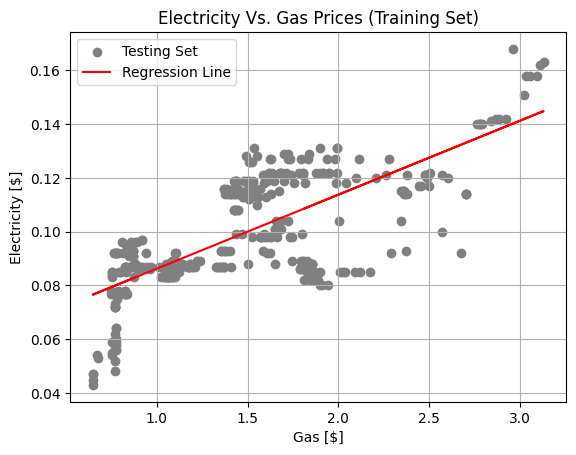

In [ ]:
plt.scatter(X_train, y_train, color = 'gray', label='Testing Set')
plt.plot(X_train, regressor.predict(X_train), color = 'red', label='Regression Line')
plt.ylabel('Electricity [$]')
plt.xlabel('Gas [$]')
plt.title ('Electricity Vs. Gas Prices (Training Set)')
plt.grid(True)
plt.legend()

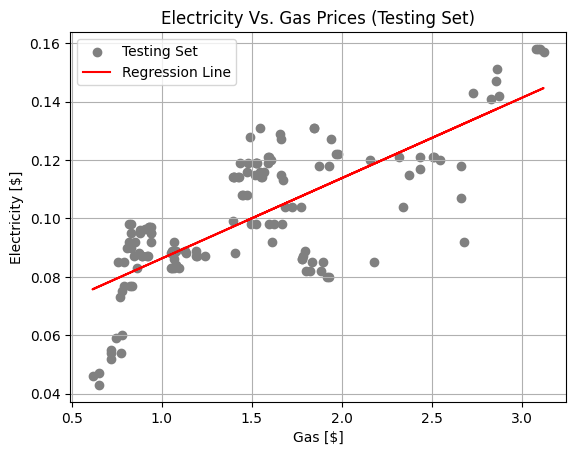

In [ ]:
plt.scatter(X_test, y_test, color = 'gray', label='Testing Set')
plt.plot(X_test, regressor.predict(X_test), color = 'red', label='Regression Line')
plt.ylabel('Electricity [$]')
plt.xlabel('Gas [$]')
plt.title ('Electricity Vs. Gas Prices (Testing Set)')
plt.grid(True)
plt.legend()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
G = 1.400
G = np.array(G)
G = G.reshape(-1, 1)
elec = regressor.predict(G)

In [ ]:
elec

array([[0.09727551]])

In [ ]:
G = 1.900
G = np.array(G)
G = G.reshape(-1, 1)
elec = regressor.predict(G)

In [ ]:
elec

array([[0.11103067]])

In [ ]:
# New data points
G_values = np.array([3.000, 3.100, 3.200, 3.300, 3.400]).reshape(-1, 1)
elec_predictions = regressor.predict(G_values)

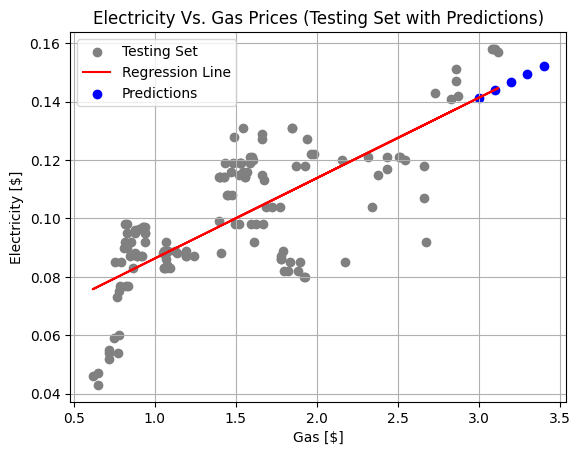

In [ ]:
plt.scatter(X_test, y_test, color='gray', label='Testing Set')
plt.plot(X_test, regressor.predict(X_test), color='red', label='Regression Line')
plt.scatter(G_values, elec_predictions, color='blue', label='Predictions')  # Plot new predictions
plt.ylabel('Electricity [$]')
plt.xlabel('Gas [$]')
plt.title('Electricity Vs. Gas Prices (Testing Set with Predictions)')
plt.grid(True)
plt.legend()

In [ ]:
elec_gas_1_predictions = pd.DataFrame(y_test)
elec_gas_1_predictions['PREDICTION'] = regressor.predict(X_test)
elec_gas_1_predictions = elec_gas_1_predictions.rename(columns={'ELECTRICITY': 'ACTUAL'})

In [ ]:
elec_gas_1_predictions.reset_index(inplace=True, drop=True)

In [ ]:
elec_gas_1_predictions

,ACTUAL,PREDICTION
0,0.147,0.137386
1,0.118,0.110259
2,0.122,0.112846
3,0.151,0.137468
4,0.104,0.107564
...,...,...
131,0.088,0.090013
132,0.087,0.083328
133,0.114,0.098018
134,0.114,0.101595


**Setting Fit_Intercept to False Causes Model to Not Use An intercept Term**

**Regression Line Will Pass Through Origin, Affecting Model's Accuracy**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = False)
regressor.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [ ]:
print('Linear Model Coefficient (m)', regressor.coef_)
print('Linear Model Coefficient (b)', regressor.intercept_)

Linear Model Coefficient (m) [[0.06234692]]
Linear Model Coefficient (b) 0.0


In [ ]:
y_predict = regressor.predict(X_test)

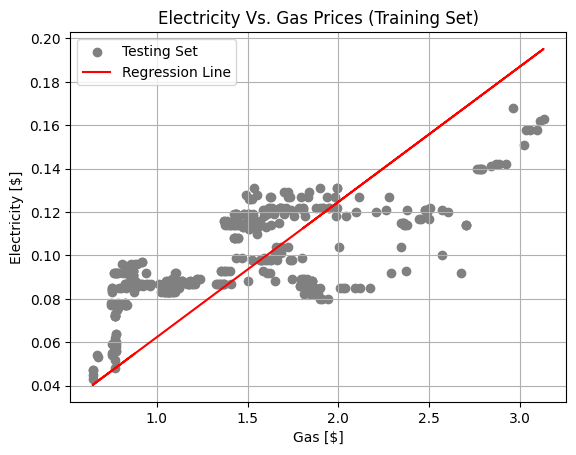

In [ ]:
plt.scatter(X_train, y_train, color = 'gray', label='Testing Set')
plt.plot(X_train, regressor.predict(X_train), color = 'red', label='Regression Line')
plt.ylabel('Electricity [$]')
plt.xlabel('Gas [$]')
plt.title ('Electricity Vs. Gas Prices (Training Set)')
plt.grid(True)
plt.legend()

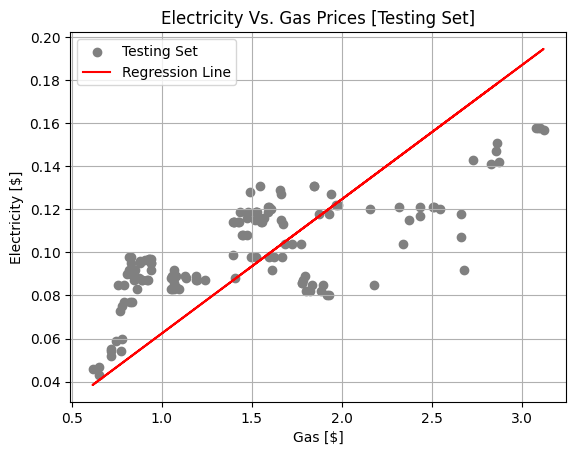

In [ ]:
plt.scatter(X_test.iloc[:, 0], y_test.iloc[:, 0], color = 'gray', label='Testing Set')
plt.plot(X_test, regressor.predict(X_test), color = 'red', label='Regression Line')
plt.ylabel('Electricity [$]')
plt.xlabel('Gas [$]')
plt.title ('Electricity Vs. Gas Prices [Testing Set]')
plt.grid(True)
plt.legend()

In [ ]:
G = 1.400
G = np.array(G)
G = G.reshape(-1, 1)
elec = regressor.predict(G)

In [ ]:
elec

array([[0.08728569]])

In [ ]:
G = 1.900
G = np.array(G)
G = G.reshape(-1, 1)
elec = regressor.predict(G)

In [ ]:
elec

array([[0.11845915]])

In [ ]:
# New data points
G_values = np.array([3.000, 3.100, 3.200, 3.300, 3.400]).reshape(-1, 1)
elec_predictions = regressor.predict(G_values)

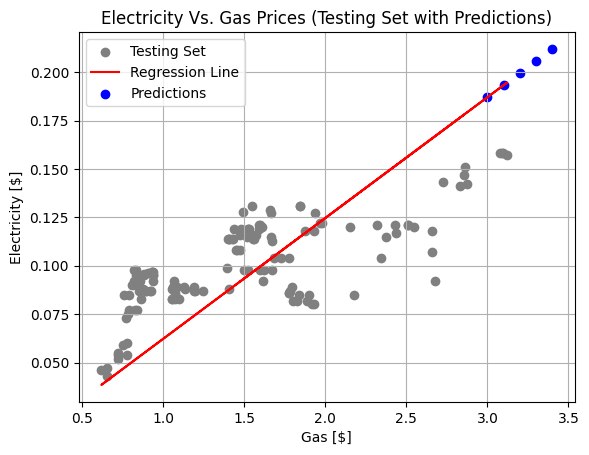

In [ ]:
plt.scatter(X_test.iloc[:, 0], y_test.iloc[:, 0], color = 'gray', label='Testing Set')
plt.plot(X_test, regressor.predict(X_test), color='red', label='Regression Line')
plt.scatter(G_values, elec_predictions, color='blue', label='Predictions')  # Plot new predictions
plt.ylabel('Electricity [$]')
plt.xlabel('Gas [$]')
plt.title('Electricity Vs. Gas Prices (Testing Set with Predictions)')
plt.grid(True)
plt.legend()

In [ ]:
elec_gas_2_predictions = pd.DataFrame(y_test)
elec_gas_2_predictions['PREDICTION'] = regressor.predict(X_test)
elec_gas_2_predictions = elec_gas_2_predictions.rename(columns={'ELECTRICITY': 'ACTUAL'})

In [ ]:
elec_gas_2_predictions.reset_index(inplace=True, drop=True)

In [ ]:
elec_gas_2_predictions

,ACTUAL,PREDICTION
0,0.147,0.178187
1,0.118,0.116710
2,0.122,0.122574
3,0.151,0.178375
4,0.104,0.110603
...,...,...
131,0.088,0.070826
132,0.087,0.055676
133,0.114,0.088969
134,0.114,0.097074


**Monthly Average Weather Readings for South Florida**

**From https://dev.meteostat.net/**




In [ ]:
# Install the meteostat package
!pip install meteostat
from meteostat import Stations
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from meteostat import Monthly
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
import statsmodels.tsa.api as smt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [ ]:
# Define latitude and longitude for Miami
latitude = 25.7617
longitude = -80.1918

In [ ]:
# Get nearby weather stations in Florida
stations = Stations()
stations = stations.nearby(latitude, longitude)
station = stations.fetch(1)  # Fetch data for the closest station

In [ ]:
# Print DataFrame
station

,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end,distance
id,,,,,,,,,,,,,,,,
72202,Miami International Airport,US,FL,72202,KMIA,25.7833,-80.3167,4.0,America/New_York,1973-01-01,2024-02-26,1948-01-01,2024-12-30,1948-01-01,2022-01-01,12735.283267


In [ ]:
# Set the station ID and time period
station_id = '72202' # Station ID for weather station near/in Miami
start = datetime(2007, 1, 1)
end = datetime(2023, 12, 30)

In [ ]:
# Get Monthly data for the specified station
data = Monthly(station_id, start, end)
weather = data.fetch()

In [ ]:
weather.index = pd.to_datetime(weather.index)
weather.index.freq = 'MS'
weather.sort_index(ascending=False, inplace=True)

In [ ]:
# Handle missing values
weather = weather.fillna(method='ffill').fillna(method='bfill')

In [ ]:
weather = weather.rename(columns={'tavg': 'AVG_TEMP'})

In [ ]:
weather.reset_index(inplace=True)
weather.rename(columns={'time': 'DATE'}, inplace=True)
weather.set_index('DATE', inplace=True)

In [ ]:
weather = weather[['AVG_TEMP']]

In [ ]:
# Calculate mean only for numeric columns
numeric_mean = weather.mean(numeric_only=True)

In [ ]:
weather.fillna(numeric_mean, inplace=True)

In [ ]:
weather = weather.iloc[::-1]

# Print DataFrame
print(weather)
print(weather.dtypes)

# Save the DataFrame as a text file
#data.to_csv('weather_data.txt', sep='\t', index=False)
#data.to_excel('weather_data.xlsx', index=False)

from google.colab import files
# files.download('weather_data.txt')  # Download the text file
# files.download('weather_data.xlsx') # Download excel file

            AVG_TEMP
DATE                
2007-01-01      22.5
2007-02-01      20.6
2007-03-01      23.2
2007-04-01      23.8
2007-05-01      25.9
...              ...
2023-08-01      29.9
2023-09-01      28.7
2023-10-01      27.5
2023-11-01      25.3
2023-12-01      21.9

[204 rows x 1 columns]
AVG_TEMP    float64
dtype: object


**Electricity Prices Vs. Temperature**

In [ ]:
elec_weather = pd.merge(electricity, weather, on='DATE', how='outer')

In [ ]:
elec_weather

,ELECTRICITY,AVG_TEMP
DATE,,
1978-11-01,0.046,NaN
1978-12-01,0.043,NaN
1979-01-01,0.043,NaN
1979-02-01,0.045,NaN
1979-03-01,0.047,NaN
...,...,...
2023-09-01,0.158,28.7
2023-10-01,0.158,27.5
2023-11-01,0.158,25.3


In [ ]:
elec_weather = elec_weather.dropna()

In [ ]:
elec_weather.index = pd.to_datetime(elec_weather.index)
elec_weather.index.freq = 'MS'

In [ ]:
elec_weather

,ELECTRICITY,AVG_TEMP
DATE,,
2007-01-01,0.122,22.5
2007-02-01,0.122,20.6
2007-03-01,0.122,23.2
2007-04-01,0.122,23.8
2007-05-01,0.122,25.9
...,...,...
2023-08-01,0.158,29.9
2023-09-01,0.158,28.7
2023-10-01,0.158,27.5


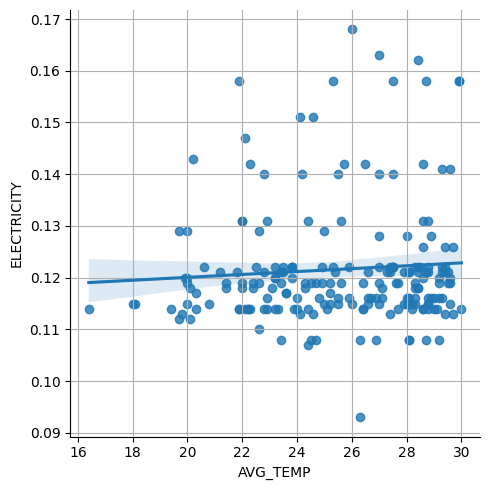

In [ ]:
sns.lmplot( x = 'AVG_TEMP', y = 'ELECTRICITY', data = elec_weather)
plt.grid(True)

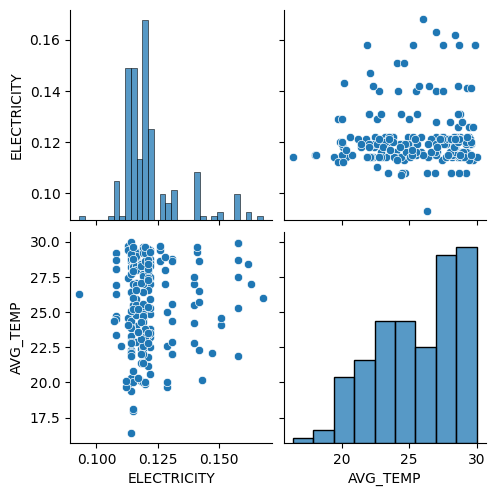

In [ ]:
sns.pairplot(elec_weather)

In [ ]:
X = elec_weather[['AVG_TEMP']]

In [ ]:
X

,AVG_TEMP
DATE,
2007-01-01,22.5
2007-02-01,20.6
2007-03-01,23.2
2007-04-01,23.8
2007-05-01,25.9
...,...
2023-08-01,29.9
2023-09-01,28.7
2023-10-01,27.5


In [ ]:
y = elec_weather[['ELECTRICITY']]

In [ ]:
y

,ELECTRICITY
DATE,
2007-01-01,0.122
2007-02-01,0.122
2007-03-01,0.122
2007-04-01,0.122
2007-05-01,0.122
...,...
2023-08-01,0.158
2023-09-01,0.158
2023-10-01,0.158


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42 )

In [ ]:
X_train.shape

(153, 1)

In [ ]:
X_test.shape

(51, 1)

In [ ]:
y_train.shape

(153, 1)

In [ ]:
y_test.shape

(51, 1)

**Setting Fit_Intercept to True Causes Model to Use An intercept Term**

**Regression Line Will Not Pass Through Origin**

In [ ]:
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('Linear Model Coefficient (m)', regressor.coef_)
print('Linear Model Coefficient (b)', regressor.intercept_)

Linear Model Coefficient (m) [[0.00039107]]
Linear Model Coefficient (b) [0.11203418]


In [ ]:
y_predict = regressor.predict(X_test)

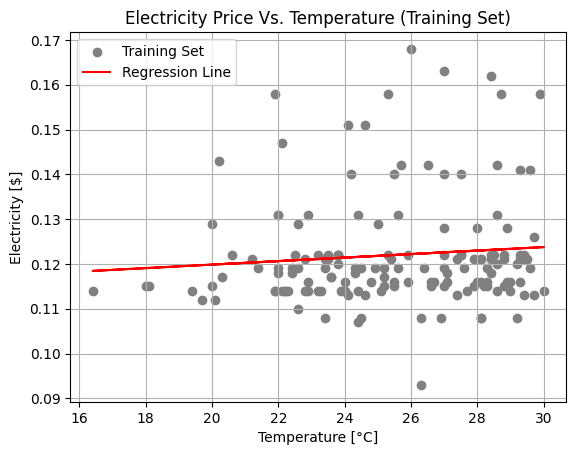

In [ ]:
plt.scatter(X_train, y_train, color = 'gray', label='Training Set')
plt.plot(X_train, regressor.predict(X_train), color = 'red', label='Regression Line')
plt.ylabel('Electricity [$]')
plt.xlabel('Temperature [°C]')
plt.title ('Electricity Price Vs. Temperature (Training Set)')
plt.grid(True)
plt.legend()

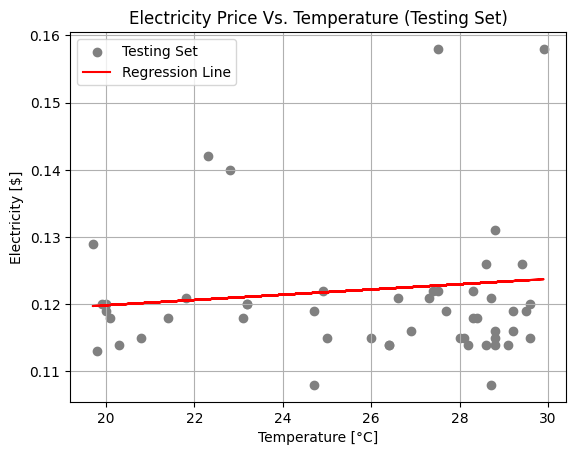

In [ ]:
plt.scatter(X_test, y_test, color = 'gray', label='Testing Set')
plt.plot(X_test, regressor.predict(X_test), color = 'red', label='Regression Line')
plt.ylabel('Electricity [$]')
plt.xlabel('Temperature [°C]')
plt.title ('Electricity Price Vs. Temperature (Testing Set)')
plt.grid(True)
plt.legend()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
G = 20
G = np.array(G)
G = G.reshape(-1, 1)
elec_weather2 = regressor.predict(G)

In [ ]:
elec_weather2

array([[0.11985558]])

In [ ]:
G = 25
G = np.array(G)
G = G.reshape(-1, 1)
elec = regressor.predict(G)

In [ ]:
elec_weather2

array([[0.11985558]])

In [ ]:
# New data points
G_values = np.array([30, 31, 32, 33, 34, 35]).reshape(-1, 1)
elec_weather2_predictions = regressor.predict(G_values)

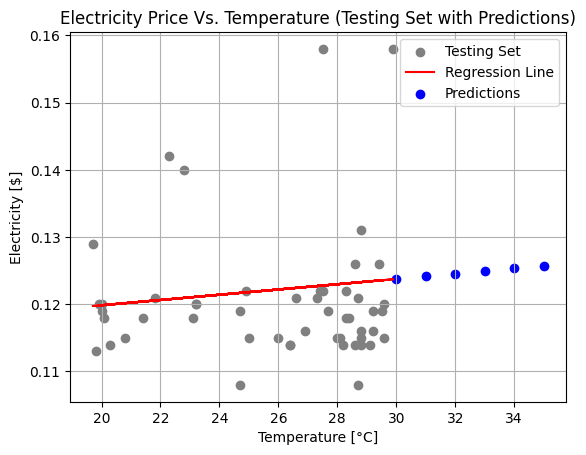

In [ ]:
plt.scatter(X_test, y_test, color='gray', label='Testing Set')
plt.plot(X_test, regressor.predict(X_test), color='red', label='Regression Line')
plt.scatter(G_values, elec_weather2_predictions, color='blue', label='Predictions')  # Plot new predictions
plt.ylabel('Electricity [$]')
plt.xlabel('Temperature [°C]')
plt.title('Electricity Price Vs. Temperature (Testing Set with Predictions)')
plt.grid(True)
plt.legend()

In [ ]:
elec_weather_1_predictions = pd.DataFrame(y_test)
elec_weather_1_predictions['PREDICTION'] = regressor.predict(X_test)
elec_weather_1_predictions = elec_weather_1_predictions.rename(columns={'ELECTRICITY': 'ACTUAL'})

In [ ]:
elec_weather_1_predictions.reset_index(inplace=True, drop=True)

In [ ]:
elec_weather_1_predictions

,ACTUAL,PREDICTION
0,0.122,0.121772
1,0.122,0.122789
2,0.108,0.123258
3,0.115,0.122984
4,0.114,0.123219
5,0.114,0.122358
6,0.119,0.119856
7,0.114,0.123414
8,0.158,0.122789
9,0.140,0.120951


**Setting Fit_Intercept to False Causes Model to Not Use An intercept Term**

**Regression Line Will Pass Through Origin, Affecting Model's Accuracy**

In [ ]:
regressor = LinearRegression(fit_intercept = False)
regressor.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [ ]:
print('Linear Model Coefficient (m)', regressor.coef_)
print('Linear Model Coefficient (b)', regressor.intercept_)

Linear Model Coefficient (m) [[0.00473674]]
Linear Model Coefficient (b) 0.0


In [ ]:
y_predict = regressor.predict(X_test)

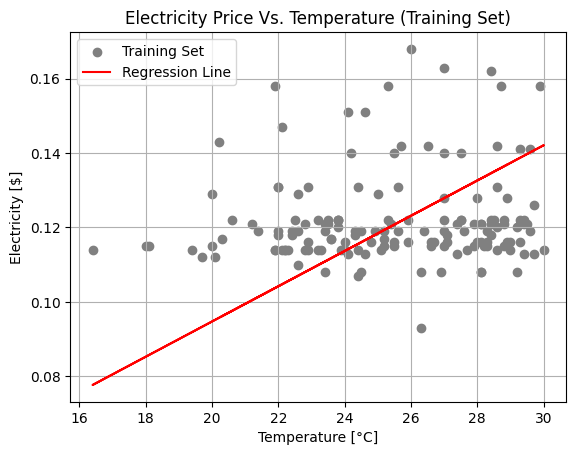

In [ ]:
plt.scatter(X_train, y_train, color = 'gray', label='Training Set')
plt.plot(X_train, regressor.predict(X_train), color = 'red', label='Regression Line')
plt.ylabel('Electricity [$]')
plt.xlabel('Temperature [°C]')
plt.title ('Electricity Price Vs. Temperature (Training Set)')
plt.grid(True)
plt.legend()

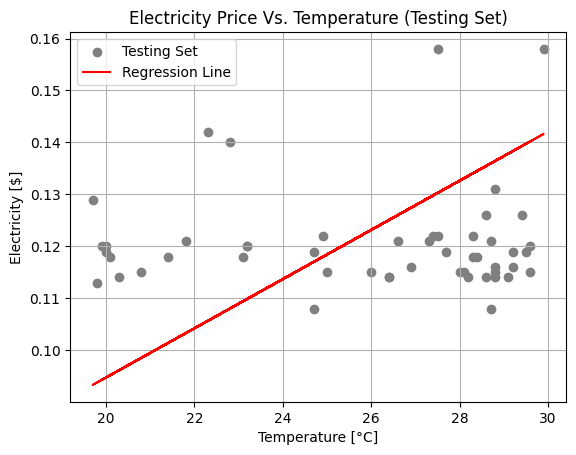

In [ ]:
plt.scatter(X_test.iloc[:, 0], y_test.iloc[:, 0], color = 'gray', label='Testing Set')
plt.plot(X_test, regressor.predict(X_test), color = 'red', label='Regression Line')
plt.ylabel('Electricity [$]')
plt.xlabel('Temperature [°C]')
plt.title ('Electricity Price Vs. Temperature (Testing Set)')
plt.grid(True)
plt.legend()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
G = 20
G = np.array(G)
G = G.reshape(-1, 1)
elec_weather2 = regressor.predict(G)

In [ ]:
elec_weather2

array([[0.09473487]])

In [ ]:
G = 25
G = np.array(G)
G = G.reshape(-1, 1)
elec = regressor.predict(G)

In [ ]:
elec_weather2

array([[0.09473487]])

In [ ]:
# New data points
G_values = np.array([30, 31, 32, 33, 34, 35]).reshape(-1, 1)
elec_weather2_predictions = regressor.predict(G_values)

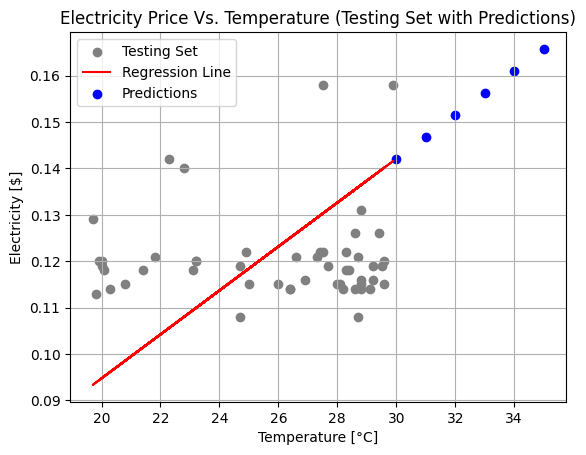

In [ ]:
plt.scatter(X_test.iloc[:, 0], y_test.iloc[:, 0], color = 'gray', label='Testing Set')
plt.plot(X_test, regressor.predict(X_test), color='red', label='Regression Line')
plt.scatter(G_values, elec_weather2_predictions, color='blue', label='Predictions')  # Plot new predictions
plt.ylabel('Electricity [$]')
plt.xlabel('Temperature [°C]')
plt.title('Electricity Price Vs. Temperature (Testing Set with Predictions)')
plt.grid(True)
plt.legend()

In [ ]:
elec_weather_2_predictions = pd.DataFrame(y_test)
elec_weather_2_predictions['PREDICTION'] = regressor.predict(X_test)
elec_weather_2_predictions = elec_weather_2_predictions.rename(columns={'ELECTRICITY': 'ACTUAL'})

In [ ]:
elec_weather_2_predictions.reset_index(inplace=True, drop=True)

In [ ]:
elec_weather_2_predictions

,ACTUAL,PREDICTION
0,0.122,0.117945
1,0.122,0.130260
2,0.108,0.135945
3,0.115,0.132629
4,0.114,0.135471
5,0.114,0.125050
6,0.119,0.094735
7,0.114,0.137839
8,0.158,0.130260
9,0.140,0.107998
